# Example for colour correction + CCF normalisation

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#plt.rcParams.update({'font.size': 16})
plt.rc('font', size=12)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["xtick.minor.size"] = 3.5
plt.rcParams["ytick.minor.size"] = 3.5
#print(plt.rcParams.keys())
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0

## Colour-correction

In the most general case, we also just normalise by the mean. So there is no need to do this polynomial fitting, but this is sufficient:

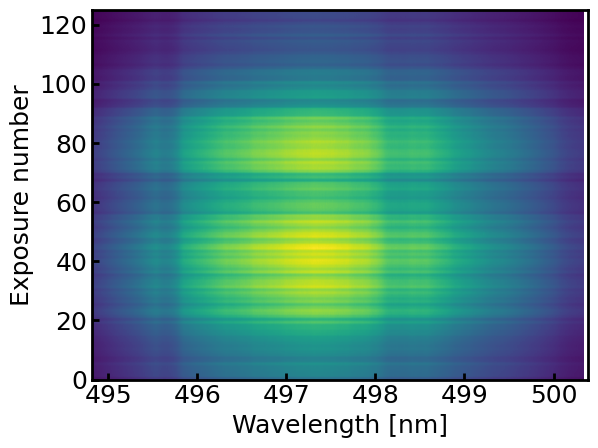

In [13]:
order = np.load('example_order.npy')
wavelength = np.load('example_wavelength.npy')

plt.figure()
plt.imshow(order, origin='lower', aspect='auto', extent=[np.min(wavelength), np.max(wavelength), 0, len(order)])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Exposure number')
plt.show()

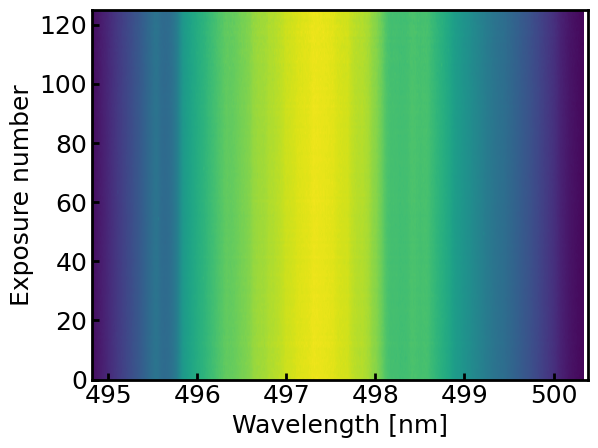

In [14]:
# Normalising the order by the median in each row (colour correction)
# or rather, but the deviation from the the mean of the medians (wow, this sounds terrible, I am sorry!)

median_flux = np.nanmedian(order, axis=1)

normalised_order = (order.T/(median_flux/np.nanmean(median_flux))).T

plt.figure()
plt.imshow(normalised_order, origin='lower', aspect='auto', extent=[np.min(wavelength), np.max(wavelength), 0, len(order)])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Exposure number')
plt.show()

# and that is it!

## Normalisation of the CCF

As an example, I am loading the CCF for the Fe I detection in my WASP-189 b paper from 2022

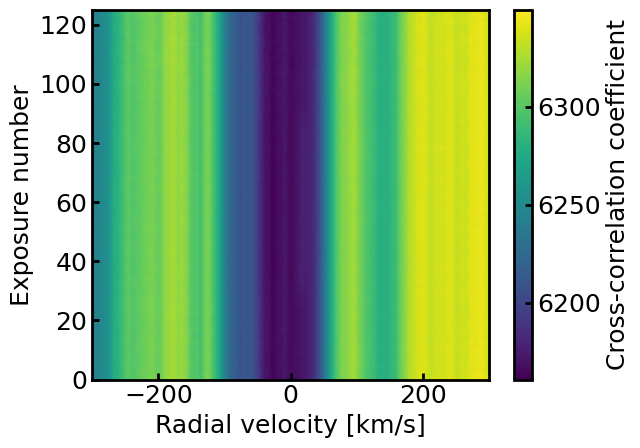

In [42]:
RV = fits.getdata('RV.fits')
CCF = fits.getdata('ccf.fits')

# this is before any renormalisation, you see that the values are also pretty high, 

plt.figure()
plt.imshow(CCF, origin='lower', aspect='auto', extent=[np.min(RV), np.max(RV), 0, len(CCF)])
plt.xlabel('Radial velocity [km/s]')
plt.ylabel('Exposure number')
plt.xlim(-300, 300)
cbar = plt.colorbar()
cbar.set_label('Cross-correlation coefficient')
plt.show()

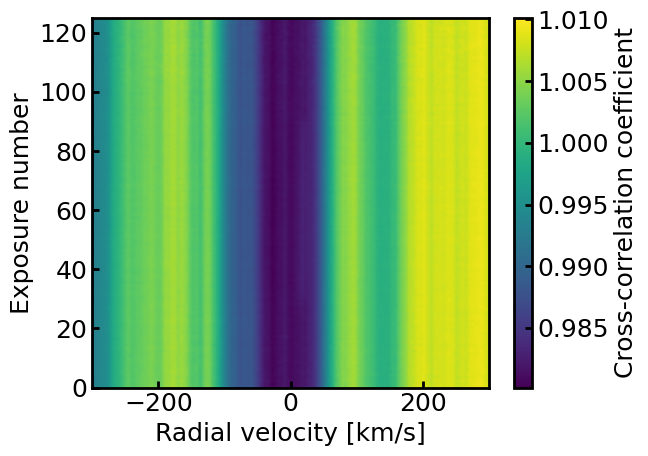

In [43]:
# for the first normalisation, we will divide the CCF by the median flux in each row (exposure) away from the planet

planet_limits = [-100, 0]
ccf_away_from_planet = np.hstack((CCF[:,0:planet_limits[0]],CCF[:,planet_limits[1]:]))
median_flux_away_from_planet = np.nanmedian(ccf_away_from_planet, axis=1)


normalised_CCF_1 = (CCF.T/median_flux_away_from_planet).T

#sigma_scaling = 0
#vmin = np.nanmean(CCF) - sigma_scaling*np.nanstd(CCF)
#vmax = np.nanmean(CCF) + sigma_scaling*np.nanstd(CCF)

plt.figure()
plt.imshow(normalised_CCF_1, origin='lower', aspect='auto', extent=[np.min(RV), np.max(RV), 0, len(CCF)])
plt.xlabel('Radial velocity [km/s]')
plt.ylabel('Exposure number')
plt.xlim(-300, 300)
cbar = plt.colorbar()
cbar.set_label('Cross-correlation coefficient')
plt.show()

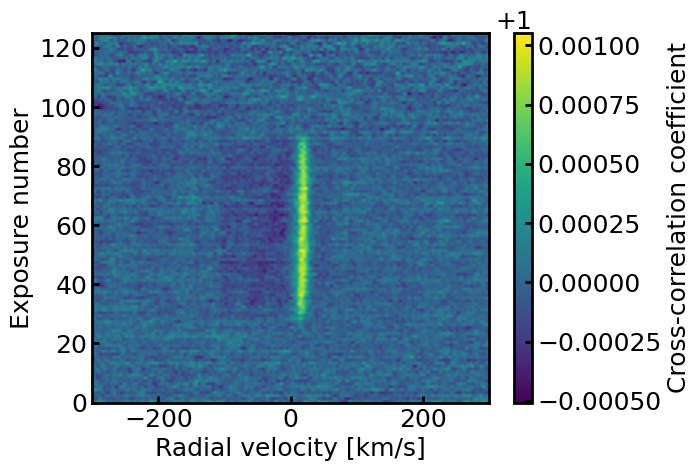

In [48]:
# now for the second normalisation, we divide the average ccf out of transit (to get rid of the star)
transit = np.load('example_transit.npy')
mean_ccf = np.nanmean(normalised_CCF_1[transit==1], axis=0)

normalised_CCF_2 = (normalised_CCF_1/mean_ccf)

#sigma_scaling = 0
#vmin = np.nanmean(CCF) - sigma_scaling*np.nanstd(CCF)
#vmax = np.nanmean(CCF) + sigma_scaling*np.nanstd(CCF)

plt.figure()
plt.imshow(normalised_CCF_2, origin='lower', aspect='auto', extent=[np.min(RV), np.max(RV), 0, len(CCF)])
plt.xlabel('Radial velocity [km/s]')
plt.ylabel('Exposure number')
plt.xlim(-300, 300)
cbar = plt.colorbar()
cbar.set_label('Cross-correlation coefficient')
plt.show()

In [ ]:
# and then you continue with the DS correction :D